## DA_Fall21_HW_1 Due at Mid-night 10/19/2021

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [22]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [23]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [24]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(54, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [8]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,54.000000,53.000000,54.000000,54.000000,54.000000,53.000000,54.000000
mean,15.668519,5.028755,5.506778,13.545407,13.931500,908.318113,133.967407
std,4.087386,2.000479,5.157681,4.463259,3.730217,232.237787,24.703393
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.725000,3.774000,3.891000,10.345000,11.262000,768.950000,112.332500
50%,15.450000,4.608000,4.542000,13.816000,13.717000,861.180000,135.840000
75%,18.350000,6.510000,5.622000,16.215000,16.579000,1011.140000,152.065000
max,23.900000,9.450000,40.642000,23.661000,21.280000,2000.030000,194.780000


## Question 1. Check if there are any null or NA

In [13]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium        True
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

**Type in your code here**

In [11]:
df = pd.DataFrame(crash)
df = df[df['speeding'].notna()]
df = df[df['ins_premium'].notna()]

In [14]:
df.isnull().any()

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

**Type in your code here**

<AxesSubplot:xlabel='accidents', ylabel='alcohol'>

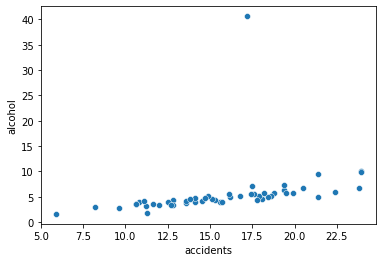

In [19]:
sns.scatterplot(x = 'accidents', y = 'alcohol', data = df)

<AxesSubplot:xlabel='accidents', ylabel='speeding'>

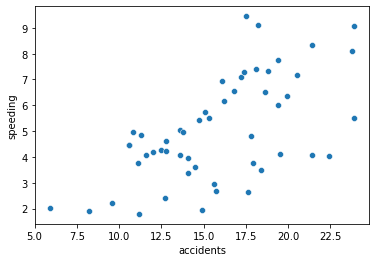

In [20]:
sns.scatterplot(x = 'accidents', y = 'speeding', data = df)

<AxesSubplot:xlabel='accidents', ylabel='not_distracted'>

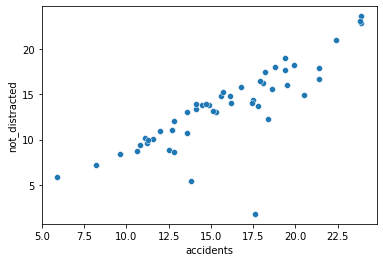

In [48]:
sns.scatterplot(x = 'accidents', y = 'not_distracted', data = df)

<AxesSubplot:xlabel='ins_premium', ylabel='ins_losses'>

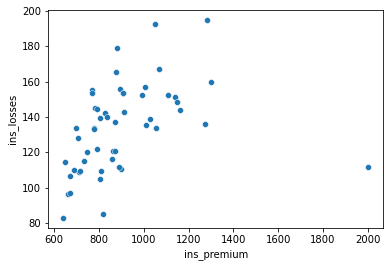

In [24]:
sns.scatterplot(x = 'ins_premium', y = 'ins_losses', data = df)

<AxesSubplot:xlabel='no_previous', ylabel='ins_premium'>

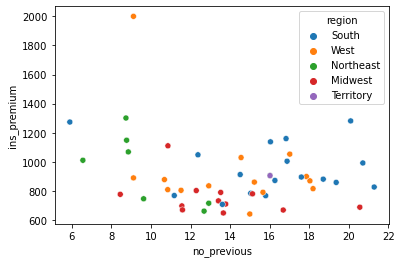

In [29]:
sns.scatterplot(x = 'no_previous', y = 'ins_premium', hue = 'region', data = df)

<AxesSubplot:xlabel='ins_premium', ylabel='alcohol'>

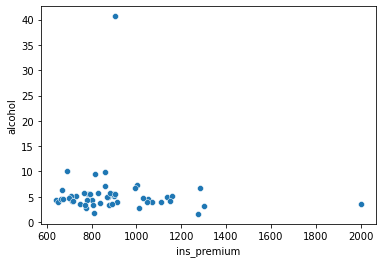

In [41]:
sns.scatterplot(x = 'ins_premium', y = 'alcohol', data = df)

<AxesSubplot:ylabel='alcohol'>

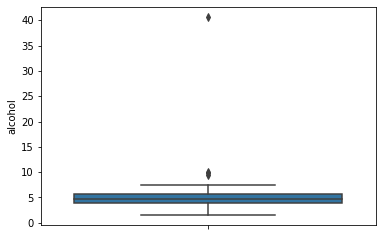

In [30]:
sns.boxplot(y=df['alcohol'])

<AxesSubplot:ylabel='ins_premium'>

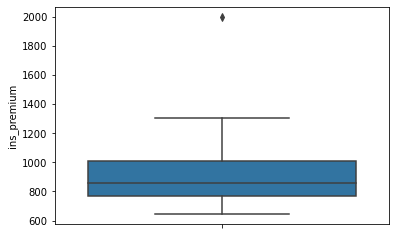

In [39]:
sns.boxplot(y=df['ins_premium'])

## Question 4. Display and Remove (the real) outliers

**Type in your code here**

In [40]:
display = df[df['alcohol'] > 20]
display = df[df['ins_premium'] > 1600]

<AxesSubplot:xlabel='ins_premium', ylabel='alcohol'>

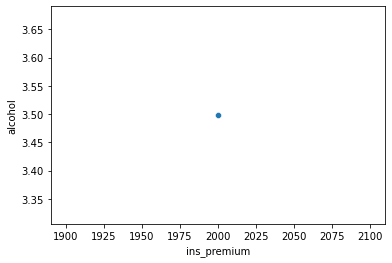

In [43]:
sns.scatterplot(x = 'ins_premium', y = 'alcohol', data = display)

In [44]:
df = df[df['alcohol'] < 20]
df = df[df['ins_premium'] < 1600]

<AxesSubplot:xlabel='ins_premium', ylabel='alcohol'>

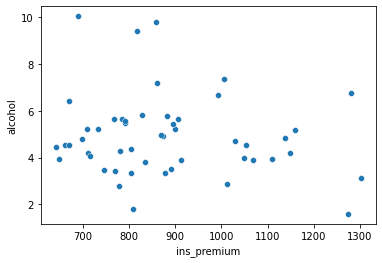

In [45]:
sns.scatterplot(x = 'ins_premium', y = 'alcohol', data = df)

<AxesSubplot:xlabel='accidents', ylabel='alcohol'>

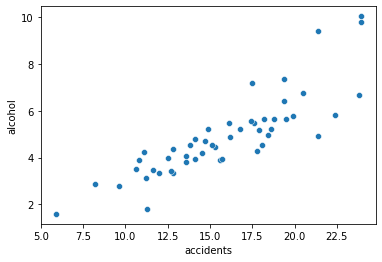

In [47]:
sns.scatterplot(x = 'accidents', y = 'alcohol', data = df)

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

**Type in your code here**

In [49]:
sql = "select region, avg(speeding) from df where region = 'Northeast'"
print(ps.sqldf(sql))

      region  avg(speeding)
0  Northeast        4.42475


## Question 6. Calculate the average alcohol for each region using SQL

**Type in your code here**

In [50]:
sql = "select region, avg(alcohol) from df group by region"
print(ps.sqldf(sql))

      region  avg(alcohol)
0    Midwest      4.996917
1  Northeast      3.980500
2      South      5.414647
3       West      4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

**Type in your code here**

In [53]:
sql = "select division, count(*) as 'occurences', avg(speeding), min(speeding), max(speeding) from df group by division"
print(ps.sqldf(sql))

             division  occurences  avg(speeding)  min(speeding)  max(speeding)
0  East North Central           5       4.106600          3.384          4.968
1  East South Central           4       4.533250          2.640          7.332
2     Middle Atlantic           2       5.446000          1.792          9.100
3            Mountain           8       5.812250          3.496          8.346
4         New England           6       4.084333          1.886          5.738
5             Pacific           5       5.949400          4.200          9.450
6      South Atlantic           9       5.030444          2.006          9.082
7  West North Central           7       4.293429          1.937          6.923
8  West South Central           4       6.333750          4.032          7.760


## Question 8. Answer Question 7 but use Pandas functions

**Type in your code here**

In [56]:
df.groupby('division').describe()

accidents                                            \
                       count       mean       std   min     25%    50%   
division                                                                 
East North Central       5.0  13.860000  0.642651  12.8  13.800  14.10   
East South Central       4.0  19.325000  1.590335  17.6  18.500  19.15   
Middle Atlantic          2.0  14.700000  4.949747  11.2  12.950  14.70   
Mountain                 8.0  16.337500  3.223989  11.3  14.425  16.35   
New England              6.0  11.733333  2.391373   8.2  10.875  11.35   
Pacific                  5.0  14.200000  3.386001  10.6  12.000  12.80   
South Atlantic           9.0  16.144444  5.619856   5.9  12.700  16.20   
West North Central       7.0  16.771429  4.383953   9.6  15.300  16.10   
West South Central       4.0  20.550000  1.312758  19.4  19.775  20.20   

                                 speeding            ... ins_premium           \
                       75%   max    count      mean  ...         75%      max   
division                                             ...                        
East North Central  14.100  14.5      5.0  4.106600  ...    803.1100  1110.61   
East South Central  19.975  21.4      4.0  4.533250  ...    878.4000   896.07   
Middle Atlantic     16.450  18.2      2.0  5.446000  ...   1202.6375  1301.52   
Mountain            18.450  21.4      8.0  5.812250  ...    877.2550  1029.87   
New England         13.100  15.1      6.0  4.084333  ...   1054.3325  1148.99   
Pacific             17.500  18.1      5.0  5.949400  ...    890.0300  1053.48   
South Atlantic      17.900  23.9      9.0  5.030444  ...   1137.8700  1273.89   
West North Central  18.600  23.9      7.0  4.293429  ...    778.8150   790.32   
West South Central  20.975  22.4      4.0  6.333750  ...   1073.9500  1281.55   

                   ins_losses                                           \
                        count        mean        std     min       25%   
division                                                                 
East North Central        5.0  128.094000  19.776546  106.62  108.9200   
East South Central        4.0  148.387500   9.014072  137.13  143.0925   
Middle Atlantic           2.0  156.855000   4.235570  153.86  155.3575   
Mountain                  8.0  113.642500  21.493294   82.75  103.3975   
New England               6.0  129.603333  25.983113   96.57  112.2600   
Pacific                   5.0  127.342000  24.054833  104.61  111.6200   
South Atlantic            9.0  146.400000  21.324469  116.29  136.0500   
West North Central        7.0  121.068571  16.616060   96.87  112.0950   
West South Central        4.0  168.215000  23.206063  142.39  153.2200   

                                               
                        50%       75%     max  
division                                       
East North Central  133.520  139.1500  152.26  
East South Central  150.325  155.6200  155.77  
Middle Atlantic     156.855  158.3525  159.85  
Mountain            115.550  126.2075  139.91  
New England         127.920  145.3425  167.02  
Pacific             120.920  133.9300  165.63  
South Atlantic      144.180  152.5600  192.70  
West North Central  114.820  133.5750  144.45  
West South Central  167.845  182.8400  194.78  

[9 rows x 56 columns]

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

**Type in your code here**

In [88]:
acc = df.groupby('region')['accidents']
speed = df.groupby('region')['speeding']
alc = df.groupby('region')['alcohol']

In [89]:
print("STDev: {}\n".format(acc.std()))
print("STDev: {}\n".format(speed.std()))
print("STDev: {}\n".format(alc.std()))

STDev: region
Midwest      3.588988
Northeast    3.077453
South        4.537037
West         3.325118
Name: accidents, dtype: float64

STDev: region
Midwest      1.537451
Northeast    2.327773
South        2.220711
West         1.803138
Name: speeding, dtype: float64

STDev: region
Midwest      1.824432
Northeast    0.872950
South        1.773576
West         1.910356
Name: alcohol, dtype: float64



In [90]:
print("skew: {}\n".format(acc.skew()))
print("skew: {}\n'".format(speed.skew()))
print("skew: {}\n".format(alc.skew()))

skew: region
Midwest      0.950845
Northeast    0.777587
South       -1.125839
West         0.064819
Name: accidents, dtype: float64

skew: region
Midwest      0.121197
Northeast    1.051666
South        0.172035
West         0.697441
Name: speeding, dtype: float64
'
skew: region
Midwest      2.093467
Northeast    0.764250
South        0.330988
West         1.159752
Name: alcohol, dtype: float64



In [65]:
print("Kurtosis: {}".format(df.groupby(['region']).apply(pd.DataFrame.kurt)))

Kurtosis:            accidents  speeding   alcohol  not_distracted  no_previous  \
region                                                                  
Midwest     2.067092 -0.737061  5.597372        1.687744     1.879846   
Northeast   0.726713  1.763520  0.890501        1.172994    -0.135506   
South       1.860064 -1.327699  2.125568        0.843642     1.717457   
West       -1.048692 -0.465455  2.219220       -0.875932    -1.231600   

           ins_premium  ins_losses  
region                              
Midwest       6.895529   -1.284943  
Northeast    -1.197166   -1.262285  
South        -0.589687    0.632626  
West          1.438275    0.427290  


In [75]:
df.groupby(['region'])['accidents'].apply(pd.DataFrame.kurtosis)

region
Midwest      5.597372
Northeast    0.890501
South        2.125568
West         2.219220
Name: alcohol, dtype: float64

In [76]:
df.groupby(['region'])['speeding'].apply(pd.DataFrame.kurtosis)

region
Midwest     -0.737061
Northeast    1.763520
South       -1.327699
West        -0.465455
Name: speeding, dtype: float64

In [77]:
df.groupby(['region'])['alcohol'].apply(pd.DataFrame.kurtosis)

region
Midwest      5.597372
Northeast    0.890501
South        2.125568
West         2.219220
Name: alcohol, dtype: float64

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

**Type in your answer here**

region
Midwest      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Northeast    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
South        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
West         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

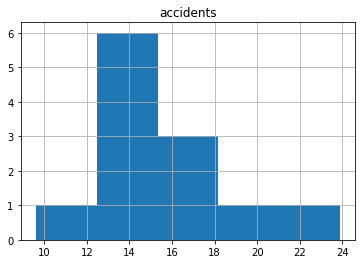

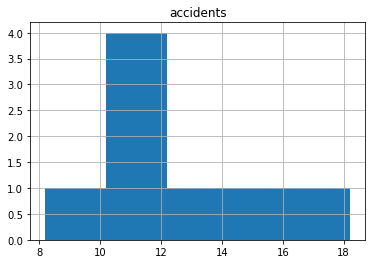

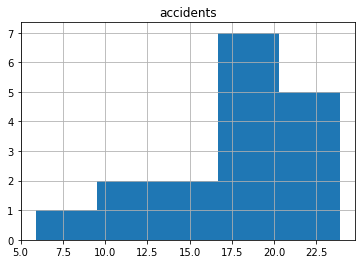

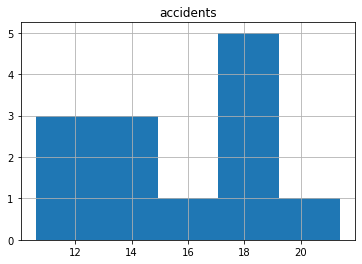

In [96]:
df.groupby('region').hist(column='accidents',bins = 5)

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

**Type in your answer here**

The Midwest has a high positive skew and a moderately low kurtosis, meaning there are a few states in the Midwest that have a normal amount of car crashes with some outliers that are less than normal..

The Northeast has a moderately high positive skew and is platykurtic, meaning there are a less than average amount of states in the Northeast with low car crashes.

The South has a high negative skew and a slightly low kurtosis, meaning there are a lot of states with a lot of car crashes.

The West has a normal skew close to 0 with a negative kurtosis, meaning there are a normal amount of car crashes with many low outliers.

## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol or ins_premium will affect accidents the most?

**Type in your code and answers here**

In [98]:
df.corr()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608632,0.850706,0.826209,0.956009,-0.174157,-0.025507
speeding,0.608632,1.000000,0.667377,0.585337,0.568831,-0.059254,-0.059624
alcohol,0.850706,0.667377,1.000000,0.730435,0.780696,-0.146921,-0.103849
not_distracted,0.826209,0.585337,0.730435,1.000000,0.745712,-0.157416,-0.068733
no_previous,0.956009,0.568831,0.780696,0.745712,1.000000,-0.119067,0.007872
ins_premium,-0.174157,-0.059254,-0.146921,-0.157416,-0.119067,1.000000,0.625381
ins_losses,-0.025507,-0.059624,-0.103849,-0.068733,0.007872,0.625381,1.000000


Alcohol has the greatest affect on accidents according to the data.

### Now Load a different dataset (MPG dataset number 3)

In [25]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code to fix the missing values by imputing value from the mean

In [102]:
mpg.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [221]:
var1 = 'mpg'
var2 = 'horsepower'
var3 = 'weight'

In [222]:
mpg[var1] = mpg[var1].fillna(mpg[var1].mean())
mpg[var2] = mpg[var2].fillna(mpg[var2].mean())
mpg[var3] = mpg[var3].fillna(mpg[var3].mean())

In [223]:
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [2]:
X = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
X[18:3:-1]

'SRQPONMLKJIHGFE'

In [3]:
X[27:16:-1]

'ZYXWVUTSR'

In [5]:
names1 = ['Amir', 'Barry', 'Charles', 'Dao']
names2 = names1
names3 = names1[:]
names2[0] = 'Alice'
names3[1] = 'Bob'
sum = 0
for name in (names1, names2, names3):
   if name[0] == 'Alice':
      sum += 1
   if name[1] == 'Bob':
      sum += 10
   print(sum)

1
2
12


In [6]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [7]:
Y=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Y[17:26:3]

[18, 21, 24]

In [8]:
Y[18:4:-3]

[19, 16, 13, 10, 7]

In [19]:
xO=5;something = x0+5


NameError: name 'x0' is not defined

In [26]:
mpg['cylinders'].unique()

array([ 8,  4,  6,  3, 20,  5], dtype=int64)

In [27]:
unique(df["cylinders"])

NameError: name 'unique' is not defined

In [29]:
mpg.unique(cylinders)

AttributeError: 'DataFrame' object has no attribute 'unique'